In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import make_interp_spline, BSpline
from sklearn.linear_model import ElasticNet

$$\frac{-\Big[\frac{-U}{\lambda(2-q)} + 1\Big]^{\frac{1-q}{2-q}}}{\lambda(1-q)}$$

In [2]:
def inverse_cdf(λ, q, U):
    k = -((-U/(λ*(2-q))) + 1)**((1-q)/(2-q))
    return k/(λ*(1-q))

$$(2-q)\lambda e_{q}(-\lambda x)$$

$$e_{q} = [1 + (1 - q)x]^{1/(1-q)}$$

In [3]:
def eq(x):
    return (1 + (1 - q) * x)**(1/(1-q))

def pdf(λ, q, x):
    return (2 - q) * λ * eq((-λ) * x)

In [4]:
# Scott's bin size
def bin_width(σ, n):
    return 3.5 * (σ/(n**(1/3)))

def num_of_bins(data):
    σ = np.std(data)
    n = len(data)
    width = bin_width(σ, n)
    return np.ceil((np.max(data) - np.min(data))/ width), width

In [5]:
def histogram(data, bins):
    sorted_data = np.sort(data)
    X = np.unique(sorted_data)
    j = 0
    count = 0
    Px = []
    for i in range(0, X.shape[0], bins):
        X_min = X[i]
        if (i + bins >= X.shape[0]):
            X_max = X.max() + 1
        else:
            X_max = X[i + bins]
        while((j < sorted_data.shape[0]) and (X_min <= sorted_data[j] < X_max)):
            count += 1
            j += 1
        Px.append(count)
        count = 0
    return X[::bins], np.array(Px)/ len(data)

In [6]:
def histogram_power2(data):
    sorted_data = np.sort(data)
    X = np.unique(sorted_data)
    width = [2**i for i in range(int(np.floor(np.log(X.astype('int').max())/np.log(2))))]
    X_values = []
    x = 0
    for w in width:
        x += w
        X_values.append(x)
    X_values.append(X.astype('int').max())
    j = 0
    count = 0
    CPx = []
    for i in range(1, len(X_values)):
        while((j < sorted_data.shape[0]) and (X_values[i-1] <= sorted_data[j] < X_values[i])):
            count += 1
            j += 1
        CPx.append(count)
        count = 0
    return X, np.array(CPx), np.array(X_values)

In [7]:
def histogram_power(data, power):
    X, X_counts = np.unique(data, return_counts=True)
    width = [power**i for i in range(int(np.ceil(np.log(X.astype('int').max())/np.log(power))))]
    x = 0
    X_values = [x]
    for w in width:
        x += w
        X_values.append(x)
    j = 0
    count = 0
    CPx = []
    for i in range(1, len(X_values)):
        while((j < X.shape[0]) and (X_values[i-1] <= X[j] < X_values[i])):
            count += X_counts[j]
            j += 1
        CPx.append(count)
        count = 0
    return X, np.array(CPx), np.array(X_values), width

In [8]:
# Deprecated
# def histogram_power(data, power):
#     sorted_data = np.sort(data)
#     X = np.unique(sorted_data)
#     width = [power**i for i in range(int(np.ceil(np.log(X.astype('int').max())/np.log(power))))]
#     x = 0
#     X_values = [x]
#     for w in width:
#         x += w
#         X_values.append(x)
#     j = 0
#     count = 0
#     CPx = []
#     for i in range(1, len(X_values)):
#         while((j < sorted_data.shape[0]) and (X_values[i-1] <= sorted_data[j] < X_values[i])):
#             count += 1
#             j += 1
#         CPx.append(count)
#         count = 0
#     return X, np.array(CPx), np.array(X_values)

In [9]:
def histogram_one(data):
    X, X_counts = np.unique(data, return_counts=True)
    width = [i for i in range(X.astype('int').max())]
    x = 0
    X_values = []
    for w in width:
        x += w
        X_values.append(x)
    j = 0
    count = 0
    CPx = []
    for i in range(1, len(X_values)):
        while((j < X.shape[0]) and (X_values[i-1] <= X[j] < X_values[i])):
            count += X_counts[j]
            j += 1
        CPx.append(count)
        count = 0
    return X, np.array(CPx), np.array(X_values), width

In [134]:
data = np.loadtxt("/home/marcio/qExp13_2.txt", delimiter=',')

In [135]:
np.unique(data)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 151., 15

In [136]:
power = np.sqrt(1.57)
X, CPx, X_values, width = histogram_power(data, power)

In [137]:
Px = np.array([CPx[i]/width[i] for i in range(len(CPx))]) / len(data)

In [138]:
def int_eq(λ, q, x):
    return -(1 - (1 - q) * λ * x) ** ((2 - q) / (1 - q))

In [139]:
λ = 2
q = 1.3
xmin = 2
# α = 1 / (1 - (int_eq(λ, q, 10E3) - int_eq(λ, q, 0)))
fx = pdf(λ, q, np.array(range(1000)))
factor = fx.sum()
# Px = factor * Px
fx = pdf(λ, q, X_values[:-1])
# fx = pdf(λ, q, X_values)

In [140]:
factor

1.9090928510843688

In [141]:
from scipy import integrate

In [142]:
integrate.simps(fx, X_values[:-1])

1.0091854296349911

In [143]:
k = integrate.simps(fx, X_values[:-1])/ integrate.simps(Px, X_values[:-1])

In [144]:
k

1.9945799249202587

In [145]:
Px[3] / fx[3]

0.3779496698571748

/home/marcio/Projects/Random-Graph/RandomGraph_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # This is added back by InteractiveShellApp.init_path()


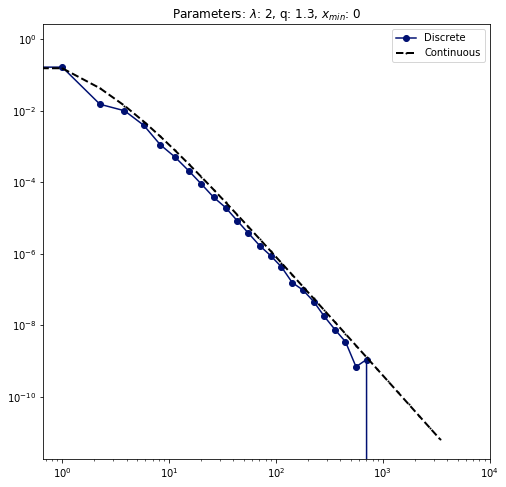

In [146]:
# plot it!
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(X_values[:-1], Px, color='#001072', marker='o', label='Discrete')
# ax.plot(range(1000), factor, color='#001072')
ax.plot(X_values[:-1], fx / factor, 'go--', color = '#000000',linewidth=2, markersize=1, label='Continuous')
plt.title("Parameters: $\lambda$: " + str(λ) + ", q: " + str(q) + ", $x_{min}$: 0")
ax.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 10000)
plt.savefig("Comparison_cont.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')
plt.show()

In [57]:
data3 = np.loadtxt("/home/marcio/qExp13_2_3.txt", delimiter=',')
data4 = np.loadtxt("/home/marcio/qExp13_2_4.txt", delimiter=',')
data5 = np.loadtxt("/home/marcio/qExp13_2_5.txt", delimiter=',')
data6 = np.loadtxt("/home/marcio/qExp13_2_6.txt", delimiter=',')
data7 = np.loadtxt("/home/marcio/qExp13_2_7.txt", delimiter=',')

OSError: /home/marcio/qExp13_2_3.txt not found.

In [ ]:
data3 = np.loadtxt("/home/marcio/qExp13_2_7.txt", delimiter=',')

In [ ]:
power = np.sqrt(3.2)
X3, CPx3, X_values3 = histogram_power(data3, power)
X4, CPx4, X_values4 = histogram_power(data4, power)
X5, CPx5, X_values5 = histogram_power(data5, power)
X6, CPx6, X_values6 = histogram_power(data6, power)
X7, CPx7, X_values7 = histogram_power(data7, power)

In [ ]:
width3 = [power**i for i in range(int(np.floor(np.log(X3.astype('int').max())/np.log(power))))]
width4 = [power**i for i in range(int(np.floor(np.log(X4.astype('int').max())/np.log(power))))]
width5 = [power**i for i in range(int(np.floor(np.log(X5.astype('int').max())/np.log(power))))]
width6 = [power**i for i in range(int(np.floor(np.log(X6.astype('int').max())/np.log(power))))]
width7 = [power**i for i in range(int(np.floor(np.log(X7.astype('int').max())/np.log(power))))]

In [ ]:
Px3 = np.array([CPx3[i]/width3[i] for i in range(len(CPx3))]) / len(data3)
Px4 = np.array([CPx4[i]/width4[i] for i in range(len(CPx4))]) / len(data4)
Px5 = np.array([CPx5[i]/width5[i] for i in range(len(CPx5))]) / len(data5)
Px6 = np.array([CPx6[i]/width6[i] for i in range(len(CPx6))]) / len(data6)
Px7 = np.array([CPx7[i]/width7[i] for i in range(len(CPx7))]) / len(data7)

In [ ]:
1 / (int_eq(λ, q, 10E7)- int_eq(λ, q, 2))

In [ ]:
λ = 2
q = 1.3
xmin = 2
# α = 1 / (1 - (int_eq(λ, q, 10E7) - int_eq(λ, q, 0)))
fx = pdf(λ, q, X_values7)

In [ ]:
Px

In [ ]:
# plot it!
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(X_values[:-1], Px,  label='N = 10E3')
# ax.plot(X_values4, np.append(Px4,0),  label='N = 10E4')
# ax.plot(X_values5[:-1], Px5,  label='N = 10E5')
# ax.plot(X_values6[:-1], Px6,  label='N = 10E6')
# ax.plot(X_values7[:-1], Px7,  label='N = 10E7')

# ax.scatter(X_values[:-1], Px/(len(data)), color='#001072', marker='x', label='Discrete / 10E5')
# ax.plot(X_values[:-1], Px, color='#001072', alpha=0.25, label='Discrete')
plt.title("Parameters: $\lambda$: " + str(λ) + ", q: " + str(q) + ", $x_{min}$: 0")
# ax.plot(X_values7, fx, 'go--', color = '#000000',linewidth=2, markersize=1, label='Continuous')
ax.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 10000)
plt.savefig("Comparison_cont.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')
plt.show()

In [ ]:
integrate.simps(fx, X_values[:-1])

In [ ]:
integrate.simps(Px, X_values[:-1])

In [ ]:
Px3, np.append(Px4,0), Px5, Px6

In [ ]:
X_values4

In [ ]:
from scipy import integrate